## Build a model to find whether the person is defaulter or not when income & balance of the person is provided


In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
dataset = pd.read_csv('C:/Users/ADMIN/Desktop/FBS/Data Science/Data sets/Default.csv')

In [76]:
dataset.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [77]:
dataset['default'].unique()

array(['No', 'Yes'], dtype=object)

In [78]:
dataset['default'].nunique()

2

In [79]:
dataset['default'].count()

np.int64(10000)

In [80]:
dataset['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='Count'>

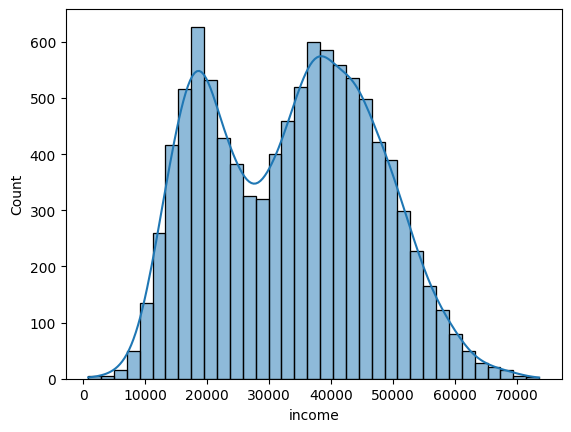

In [81]:
sns.histplot(dataset,x="income",kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x230edf2c7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x230edf2cd70>,
 'boxes': [<matplotlib.lines.Line2D at 0x230edf2c2f0>],
 'medians': [<matplotlib.lines.Line2D at 0x230edf2d2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230edf2d5b0>],
 'means': []}

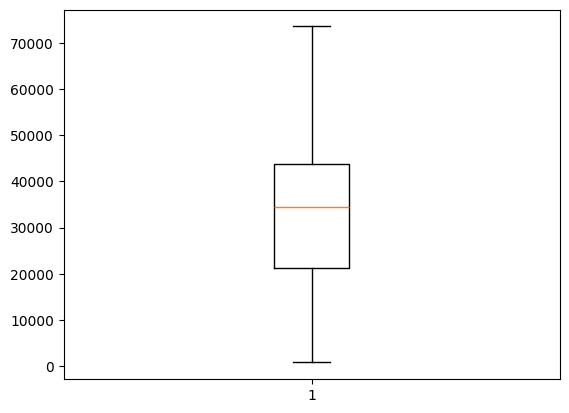

In [82]:
plt.boxplot(dataset['income'])

<Axes: xlabel='balance', ylabel='Count'>

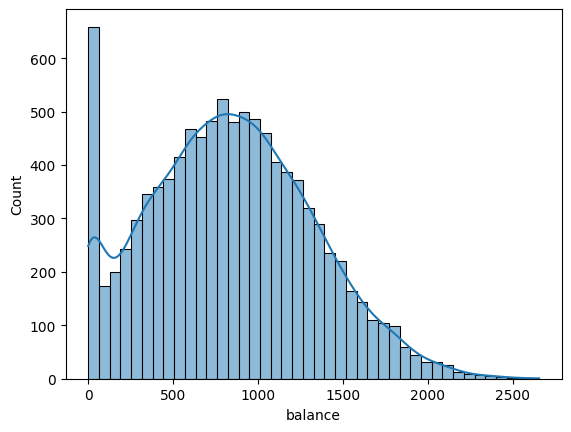

In [83]:
sns.histplot(dataset,x="balance",kde = True)

{'whiskers': [<matplotlib.lines.Line2D at 0x230ed721820>,
 'caps': [<matplotlib.lines.Line2D at 0x230ed66aba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x230ed7216a0>],
 'medians': [<matplotlib.lines.Line2D at 0x230ed6b8ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x230ed6b8f20>],
 'means': []}

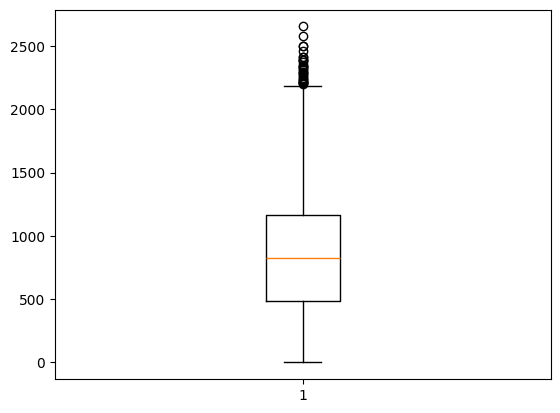

In [84]:
plt.boxplot(dataset['balance'])

In [85]:
q1 = dataset['balance'].quantile(0.25)

In [86]:
q3 = dataset['balance'].quantile(0.75)

In [87]:
IQR = q3-q1
IQR

np.float64(684.5772817)

In [88]:
upper = q3 + (IQR*1.5)
upper

np.float64(2193.1743093)

In [89]:
dataset[dataset['balance']>upper]['default'].value_counts()

default
Yes    26
No      5
Name: count, dtype: int64

In [90]:
# dataset[dataset['balance']>upper]['default'] #the data having outliers for baalnce

In [91]:
# out_ind = dataset[dataset['balance']>=2500].index
# dataset.drop(out_ind,inplace=True)

In [92]:
 dataset.drop(dataset[dataset['balance']>=2500].index,inplace=True)

### Encoding

In [93]:
dataset.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [94]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['student']= le.fit_transform(dataset['student'])

In [95]:
dataset.head()

,default,student,balance,income
0,No,0,729.526495,44361.62507
1,No,1,817.180407,12106.13470
2,No,0,1073.549164,31767.13895
3,No,0,529.250605,35704.49394
4,No,0,785.655883,38463.49588


## Divide X & y

In [96]:
X = dataset.drop('default',axis=1)
y= dataset['default']

## tranformation / scaling

In [97]:
dataset.describe()

,student,balance,income
count,9997.000000,9997.000000,9997.000000
mean,0.294188,834.851794,33520.779654
std,0.455700,482.842711,13336.614728
min,0.000000,0.000000,771.967729
25%,0.000000,481.591003,21341.653840
50%,0.000000,823.471373,34558.615780
75%,1.000000,1165.936504,43809.259950
max,1.000000,2499.016750,73554.233500


In [98]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_trans = ss.fit_transform(X)
x_trans

array([[-0.64560699, -0.21814675,  0.81290402],
       [ 1.54892994, -0.03660047, -1.60578352],
       [-0.64560699,  0.49438317, -0.13149727],
       ...,
       [-0.64560699,  0.02187198,  1.88328403],
       [-0.64560699,  1.52056553,  0.23607866],
       [ 1.54892994, -1.31297689, -1.24909213]], shape=(9997, 3))

In [99]:
X = pd.DataFrame(x_trans,columns=X.columns)
X

,student,balance,income
0,-0.645607,-0.218147,0.812904
1,1.548930,-0.036600,-1.605784
2,-0.645607,0.494383,-0.131497
3,-0.645607,-0.632952,0.163746
4,-0.645607,-0.101893,0.370631
...,...,...,...
9992,-0.645607,-0.255369,1.460084
9993,-0.645607,-0.159250,-1.039301
9994,-0.645607,0.021872,1.883284
9995,-0.645607,1.520566,0.236079


In [100]:
X.describe()

,student,balance,income
count,9.997000e+03,9.997000e+03,9.997000e+03
mean,-4.566607e-17,-6.681106e-17,-2.590705e-16
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-6.456070e-01,-1.729121e+00,-2.455679e+00
25%,-6.456070e-01,-7.316636e-01,-9.132554e-01
50%,-6.456070e-01,-2.357080e-02,7.782245e-02
75%,1.548930e+00,6.857332e-01,7.714848e-01
max,1.548930e+00,3.446771e+00,3.001920e+00


In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

In [102]:
### Build model

In [103]:
from sklearn.neighbors import KNeighborsClassifier


In [104]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [105]:
test_pred = knn.predict(X_test)

In [106]:
from sklearn. metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [107]:
accuracy_score(y_test, test_pred)   #accuracy score

0.966

In [108]:
confusion_matrix(y_test,test_pred)

array([[2867,   33],
       [  69,   31]])

In [109]:
y_test.value_counts()   #actual classes counts

default
No     2900
Yes     100
Name: count, dtype: int64

In [110]:
pd.Series(test_pred).value_counts() #predicted classes conts

No     2936
Yes      64
Name: count, dtype: int64

In [111]:
matrix = pd.DataFrame({"Positive":[2867,64], "Negative":[33,31]})
matrix

,Positive,Negative
0,2867,33
1,64,31


In [133]:
prec_positive = precision_score(y_test,test_pred,pos_label='No')
prec_positive

0.9762952929224518

In [134]:
prec_negative = precision_score(y_test,test_pred,pos_label='Yes') 

In [135]:
prec_negative


0.6382978723404256

In [136]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

          No       0.98      0.99      0.99      2900
         Yes       0.64      0.30      0.41       100

    accuracy                           0.97      3000
   macro avg       0.81      0.65      0.70      3000
weighted avg       0.97      0.97      0.97      3000



In [137]:
train_pred = knn.predict(X_train)

In [138]:
accuracy_score(y_train, train_pred)

0.975418036301272

In [139]:
confusion_matrix(y_train,train_pred)

array([[6740,   27],
       [ 145,   85]])

In [140]:
y_train.value_counts()

default
No     6767
Yes     230
Name: count, dtype: int64

In [141]:
pd.Series(train_pred).value_counts()

No     6885
Yes     112
Name: count, dtype: int64

In [142]:
prec_positive = precision_score(y_train,train_pred,pos_label='No')
prec_positive

0.9789397240377633

In [143]:
prec_negative = precision_score(y_train,train_pred,pos_label='Yes')

In [144]:
prec_negative

0.7589285714285714

In [145]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      6767
         Yes       0.76      0.37      0.50       230

    accuracy                           0.98      6997
   macro avg       0.87      0.68      0.74      6997
weighted avg       0.97      0.98      0.97      6997



In [146]:
## n= 5


In [147]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

test_pred = knn.predict(X_test)
accuracy_score(y_test, test_pred)   

0.9683333333333334

In [148]:
## manual way to decide k value

In [149]:
train_acc=[]
test_acc=[]
k = []
for x in range(3,16,2):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train,y_train)
    k.append(x)
    test_pred = knn.predict(X_test)
    train_pred = knn.predict(X_train)
    test_acc.append(accuracy_score(y_test, test_pred))
    train_acc.append(accuracy_score(y_train, train_pred))
    

In [150]:
train_acc

[0.9779905673860226,
 0.9762755466628555,
 0.9749892811204802,
 0.9752751179076747,
 0.9761326282692583,
 0.9755609546948693,
 0.975418036301272]

In [151]:
test_acc

[0.966,
 0.9683333333333334,
 0.969,
 0.9696666666666667,
 0.9696666666666667,
 0.9703333333333334,
 0.971]

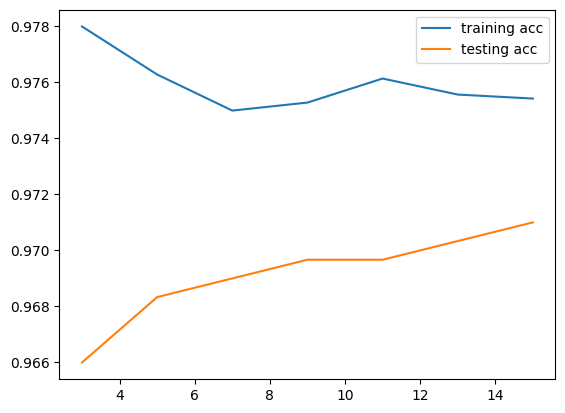

In [152]:
plt.plot(k,train_acc)
plt.plot(k,test_acc)
plt.legend(["training acc", "testing acc"]) 

In [154]:
x = np.random.randint(1,40,10)
x

array([39, 37, 17, 12, 22,  6, 28, 29,  2, 11], dtype=int32)

In [155]:
y = np.random.randint(1,100,10)
y

array([14, 93, 80,  6, 51, 45, 86, 18, 79,  1], dtype=int32)